# TP Clustering 
### **Thomas Cotte et Rayane Makri**


Imports nécessaires pour le tp 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff

from sklearn import cluster
from sklearn import metrics

Fonctions pour charger les données et pour les visualiser

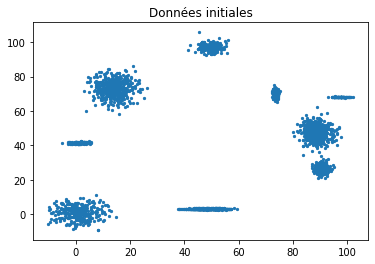

In [5]:
#chargement des données
def load_data(filename,relative_path="./artificial/"):
    databrut=arff.loadarff(open(relative_path+filename,'r'))
    data= [[x[0],x[1]] for x in databrut[0]]
    return np.array(data)

#visualisation des données intiales
def visualise_initial(data):
    plt.title("Données initiales")
    plt.scatter(data[:,0],data[:,1],s=5)
    plt.show()

def visualise_predict(data,pred):
    plt.title("Données initiales")
    plt.scatter(data[:,0],data[:,1],c=pred,s=5)
    plt.show()
    
#essaie avec le fichier "/2d-10c.arff"
data = load_data("/2d-10c.arff")
visualise_initial(data)

# Méthode K-Means


Méthode basé centres de masses.
On s'attend à une mauvais reconnaissance des clusters non convexes et à des bon temps d'éxécution.

## Clusters identifiable par la méthode K-Means

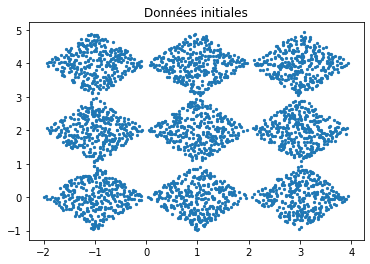

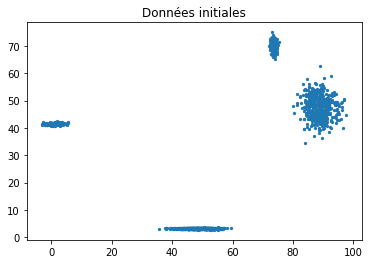

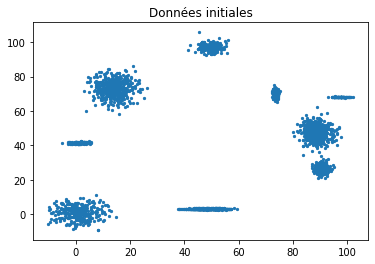

In [6]:
files_kmeans=["diamond9.arff","2d-4c.arff","2d-10c.arff"]
for file in files_kmeans:
    visualise_initial(load_data(file))

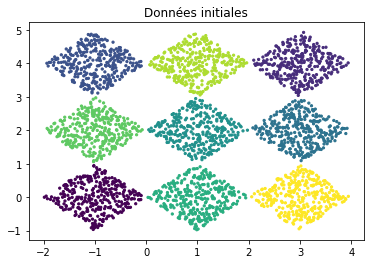

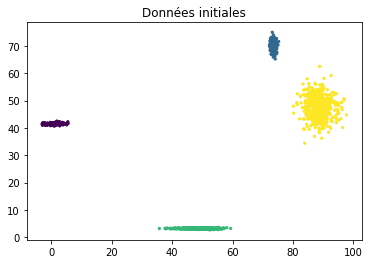

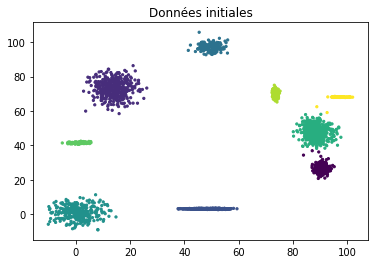

In [7]:
#nombre de cluster respectifs dans les fichiers données dans files_kmeans
n_clusters=[9,4,9]
for (file,clusters) in zip(files_kmeans,n_clusters):
    data=load_data(file)
    pred=cluster.KMeans(n_clusters=clusters,init='k-means++').fit_predict(data)
    visualise_predict(data,pred)

## Métrique Silhouette pour trouver le nombre de clusters de k-means

In [8]:
#détermine le nombre de clusters grâce au coéfficient de silhouette
def sil_n_clusters(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.KMeans(n_clusters=k, init='k-means++').fit(data)
        silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        if (best<silh):
            n_cluster = k
            best = silh
    return n_cluster
        

nb clusters = 9 , nb iter = 3 , runtime =  2488.77 ms


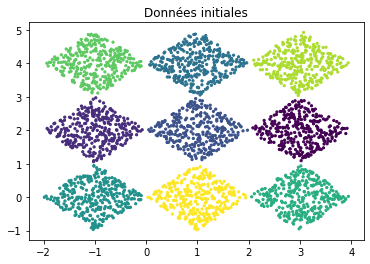

nb clusters = 4 , nb iter = 2 , runtime =  805.85 ms


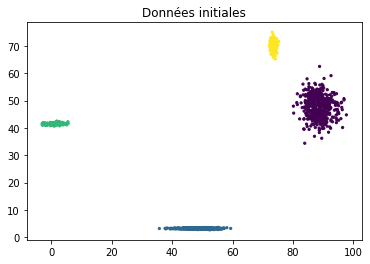

nb clusters = 9 , nb iter = 2 , runtime =  2078.44 ms


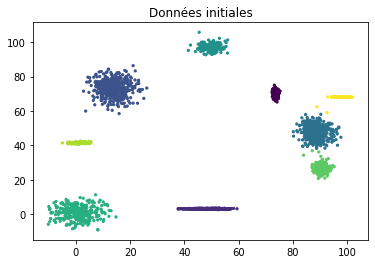

In [9]:
for file in files_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = sil_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

## Métrique Score de Davies-Bouldin pour trouver le nombre de cluster de k-means


In [10]:
#détermine le nombre de clusters grâce au score de Davies-Bouldin
def davies_n_clusters(min,max,data):
    n_cluster = min
    #nombre arbitrairement haut 
    best = 1000000
    for k in range(min,max+1,1):
        model = cluster.KMeans(n_clusters=k,init='k-means++').fit(data)
        score = metrics.davies_bouldin_score(data, model.labels_)
        if score < best:
            best = score
            n_cluster = k
    return n_cluster

nb clusters = 9 , nb iter = 4 , runtime =  763.12 ms


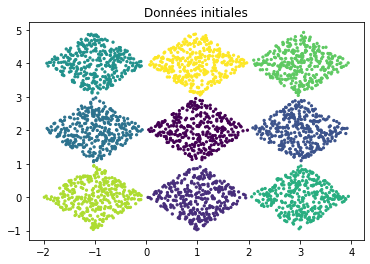

nb clusters = 4 , nb iter = 2 , runtime =  428.82 ms


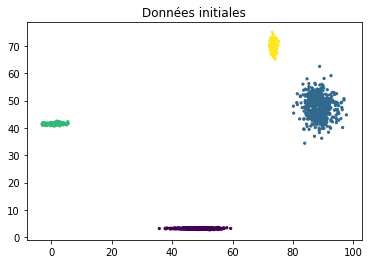

nb clusters = 9 , nb iter = 2 , runtime =  472.74 ms


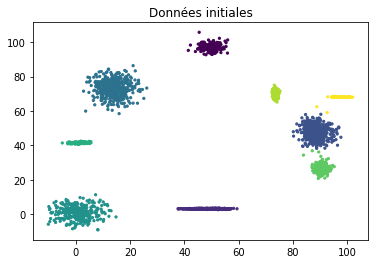

In [11]:
for file in files_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = davies_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

## Clusters difficilement identifiable par la méthode K-Means

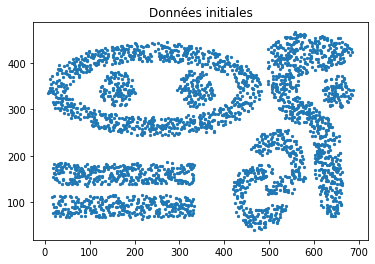

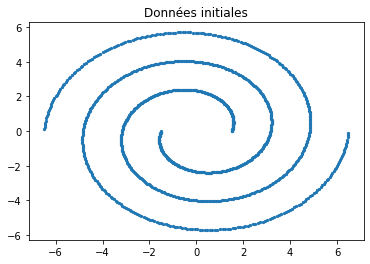

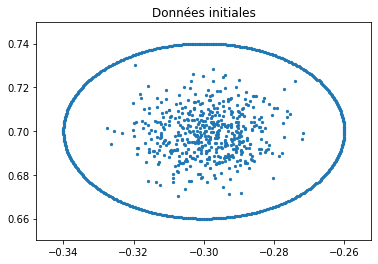

In [12]:
bad_kmeans=["complex9.arff","spiral.arff","donut2.arff"]
for file in bad_kmeans:
    visualise_initial(load_data(file))

### En utilisant la métrique silhouette pour déterminer le nombre de clusters

nb clusters = 2 , nb iter = 5 , runtime =  2741.64 ms


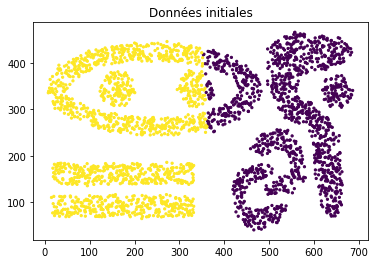

nb clusters = 13 , nb iter = 26 , runtime =  1063.15 ms


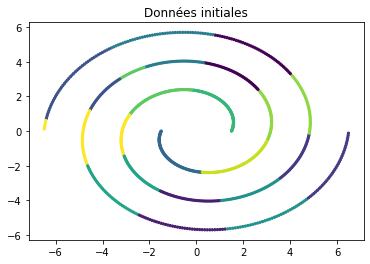

nb clusters = 6 , nb iter = 10 , runtime =  917.55 ms


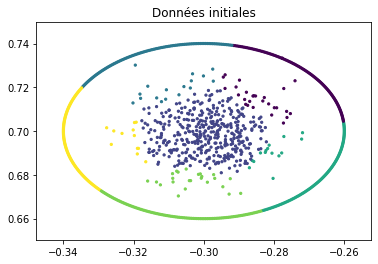

In [13]:
for file in bad_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = sil_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

### En utilisant le score de Davies-Bouldin pour déterminer le nombre de clusters


nb clusters = 6 , nb iter = 10 , runtime =  1056.18 ms


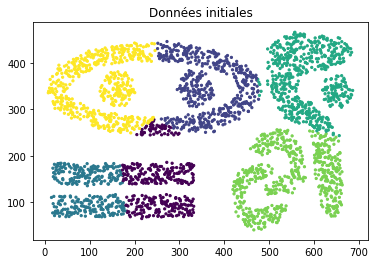

nb clusters = 12 , nb iter = 44 , runtime =  813.83 ms


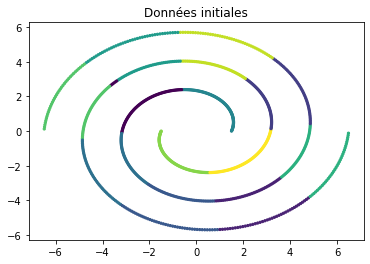

nb clusters = 13 , nb iter = 19 , runtime =  673.23 ms


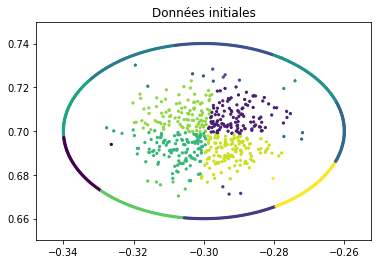

In [14]:
for file in bad_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = davies_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

# Méthode de Clustering Agglomératif

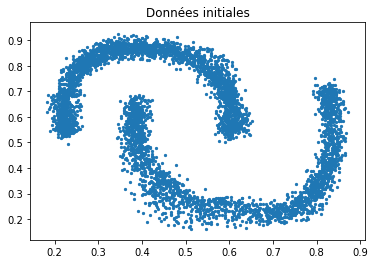

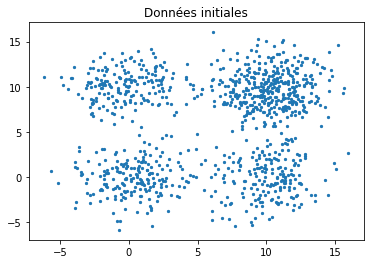

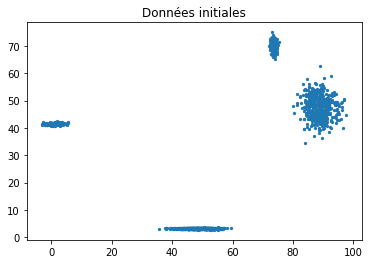

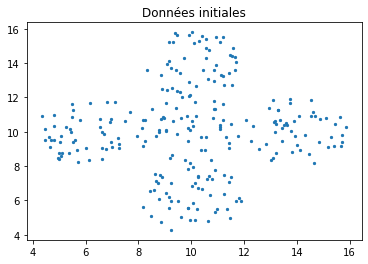

In [70]:
#respectivement : fichier marchant bien pour linkage de type: single, average, complete, et ward
files_aglo=["banana.arff","sizes1.arff","2d-4c.arff","spherical_5_2.arff"]
for file in files_aglo:
    data=load_data(file)
    visualise_initial(data)

## Linkage Single

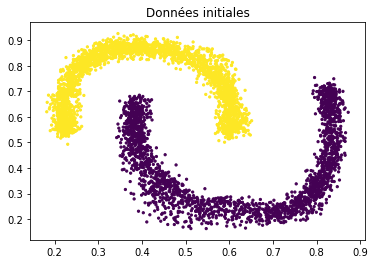

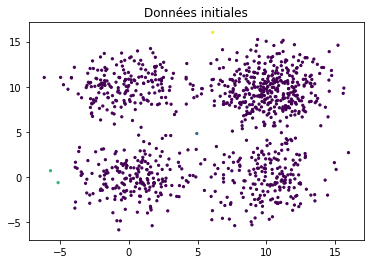

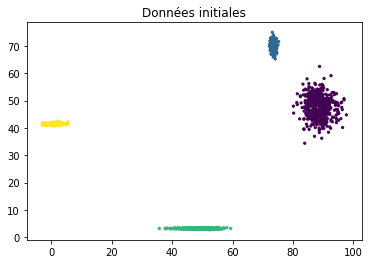

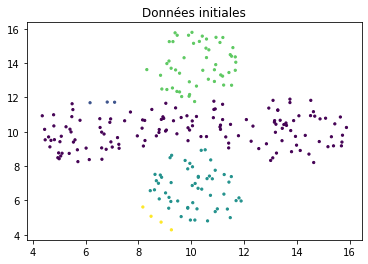

In [71]:
#nombre de cluster respectifs dans les fichiers données dans files_aglo
n_clusters=[2,4,4,5]
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='single').fit_predict(data)
    visualise_predict(data,pred)

## Linkage average

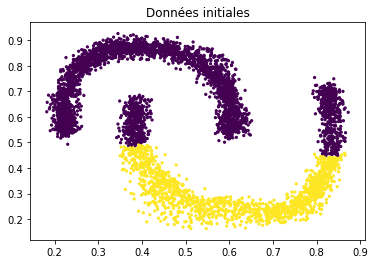

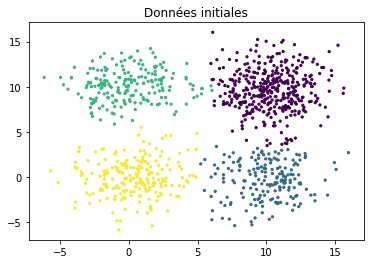

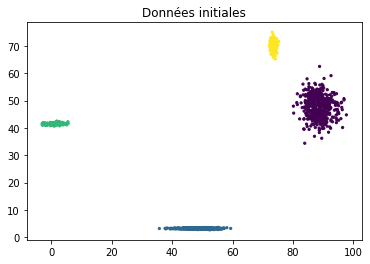

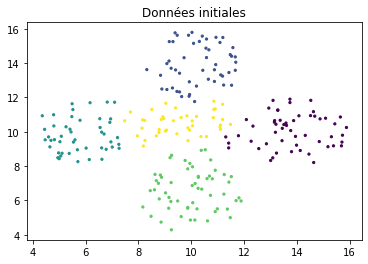

In [72]:
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='average').fit_predict(data)
    visualise_predict(data,pred)

## Linkage Complete

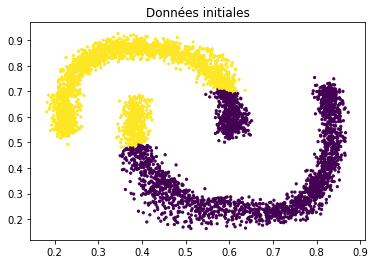

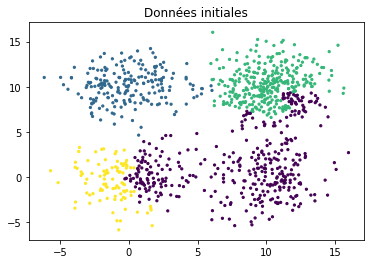

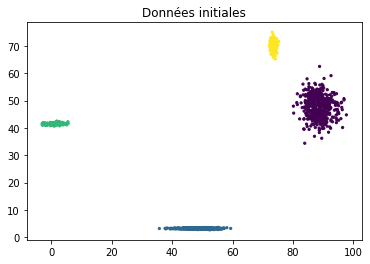

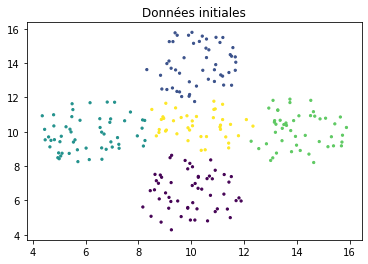

In [73]:
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='complete').fit_predict(data)
    visualise_predict(data,pred)

## Linkage ward

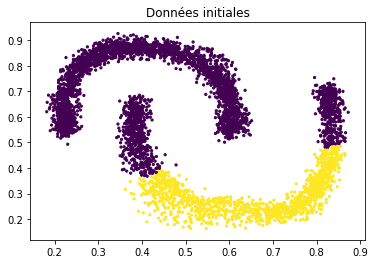

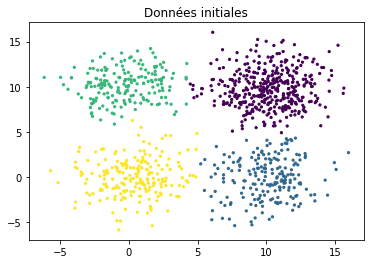

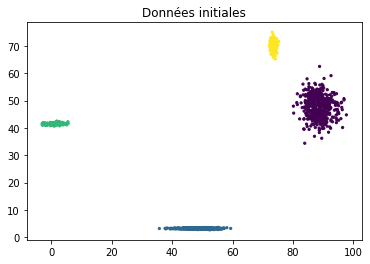

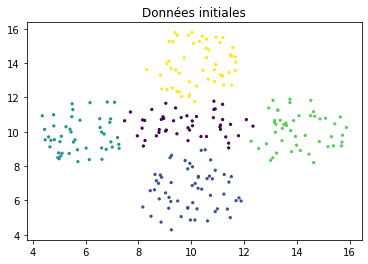

In [74]:
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='ward').fit_predict(data)
    visualise_predict(data,pred)

## Méthode Clustering DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbcluster = DBSCAN(eps=0.05, min_samples=5).fit(list)
plt.scatter(x,y,s=5,c=colors[dbcluster.labels_])

## Méthode Clustering HDBSCAN

In [ ]:
import hdbscan
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)

clusterer = hdbscan.RobustSingleLinkage(cut=0.05, k=1)
cluster_labels = clusterer.fit_predict(list)
plt.scatter(x,y,s=5,c=colors[cluster_labels])
plt.show()
print(cluster_labels)

hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()
